# Exploratory Data Analysis 

In [1]:
import numpy as np
import pandas as pd
import swifter

In [ ]:
DATA_DIR = "./data"

## Look at the submission file format

In [2]:
submission = pd.read_parquet(f'{DATA_DIR}/sample_submission.parquet', engine='fastparquet')
submission

,event_id,azimuth,zenith
0,2092,1,1
1,7344,1,1
2,9482,1,1


# Check out the Meta files

In [3]:
train_meta_df = pd.read_parquet(f'{DATA_DIR}/train_meta.parquet', engine='fastparquet')
train_meta_df

,batch_id,event_id,first_pulse_index,last_pulse_index,azimuth,zenith
0,1,24,0,60,5.029555,2.087498
1,1,41,61,111,0.417742,1.549686
2,1,59,112,147,1.160466,2.401942
3,1,67,148,289,5.845952,0.759054
4,1,72,290,351,0.653719,0.939117
...,...,...,...,...,...,...
131953919,660,2147483597,24339210,24339349,5.895612,0.333071
131953920,660,2147483603,24339350,24339383,3.273695,1.503301
131953921,660,2147483617,24339384,24339424,2.945376,1.723253
131953922,660,2147483626,24339425,24339499,1.616582,1.937025


In [4]:
test_meta_df = pd.read_parquet(f'{DATA_DIR}test_meta.parquet', engine='fastparquet')
test_meta_df

,batch_id,event_id,first_pulse_index,last_pulse_index
0,661,2092,0,298
1,661,7344,299,334
2,661,9482,335,377


## Explore the first batch file of the dataset

In [5]:
batch_1_df = pd.read_parquet(f'{DATA_DIR}train/batch_1.parquet', engine='fastparquet')
batch_1_df

,sensor_id,time,charge,auxiliary
event_id,,,,
24,3918,5928,1.325,True
24,4157,6115,1.175,True
24,3520,6492,0.925,True
24,5041,6665,0.225,True
24,2948,8054,1.575,True
...,...,...,...,...
3266196,1961,17617,0.975,True
3266196,36,17705,0.625,True
3266196,356,18192,0.725,True


In [6]:
batch_1_df.describe()

,sensor_id,time,charge
count,3.279242e+07,3.279242e+07,3.279242e+07
mean,2.713045e+03,1.313048e+04,3.908981e+00
std,1.543416e+03,4.876797e+03,1.628897e+01
min,0.000000e+00,5.714000e+03,2.500000e-02
25%,1.366000e+03,1.056600e+04,7.750000e-01
50%,2.741000e+03,1.181500e+04,1.075000e+00
75%,4.096000e+03,1.391600e+04,1.775000e+00
max,5.159000e+03,7.778500e+04,2.762025e+03


In [7]:
batch_1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32792416 entries, 24 to 3266196
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   sensor_id  int16  
 1   time       int64  
 2   charge     float64
 3   auxiliary  bool   
dtypes: bool(1), float64(1), int16(1), int64(1)
memory usage: 844.4 MB


In [8]:
batch_1_df.reset_index().groupby('event_id')

### Plot time VS charge

<AxesSubplot:xlabel='time'>

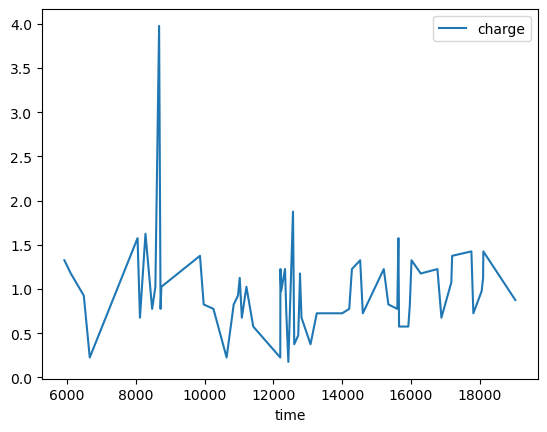

In [9]:
batch_1_df.loc[24].plot('time', 'charge')

### Add event relative time to the dataframe

In [10]:
def add_event_relative_time(gr: pd.DataFrame) -> pd.DataFrame:
    """Add relative time from the start of the event to each observation in

    Args:
        gr (pd.DataFrame): A singe dataframe representing the event

    Returns:
        pd.DataFrame: The new event with the relative time added
    """
    gr['rel_time'] = gr['time'] - gr['time'].min()
    return gr

In [11]:
rel_time_batch = batch_1_df.reset_index().swifter.groupby('event_id')
rel_time_batch = rel_time_batch.apply(add_event_relative_time)

2023-02-02 11:25:41,580	INFO worker.py:1538 -- Started a local Ray instance.
(raylet) Spilled 3529 MiB, 32 objects, write throughput 80 MiB/s. Set RAY_verbose_spill_logs=0 to disable this message.
(raylet) Spilled 6299 MiB, 41 objects, write throughput 104 MiB/s.
(raylet) Spilled 9907 MiB, 50 objects, write throughput 91 MiB/s.
(raylet) Spilled 16892 MiB, 63 objects, write throughput 89 MiB/s.


  0%|          | 0/32 [00:00<?, ?it/s]

event_id  sensor_id   time  charge  auxiliary  rel_time
event_id                                                                  
24       0               24       3918   5928   1.325       True         0
         1               24       4157   6115   1.175       True       187
         2               24       3520   6492   0.925       True       564
         3               24       5041   6665   0.225       True       737
         4               24       2948   8054   1.575       True      2126
...                     ...        ...    ...     ...        ...       ...
3266196  32792411   3266196       1961  17617   0.975       True     11714
         32792412   3266196         36  17705   0.625       True     11802
         32792413   3266196        356  18192   0.725       True     12289
         32792414   3266196       2826  18609   0.575       True     12706
         32792415   3266196       5013  18741   1.375       True     12838

[32792416 rows x 6 columns]

In [21]:
# rel_time_batch.columns.tolist()
rel_time_batch.drop(columns=['event_id']).unstack()

/tmp/ipykernel_6839/1458366556.py:2: PerformanceWarning: The following operation may generate 6558483200000 cells in the resulting pandas object.
  rel_time_batch.drop(columns=['event_id']).unstack()


MemoryError: Unable to allocate 5.96 TiB for an array with shape (6558483200000,) and data type bool

In [13]:
rel_time_batch.groupby('event_id').plot('rel_time', 'charge')

ValueError: 'event_id' is both an index level and a column label, which is ambiguous.

## Explore sensors

In [ ]:
sensor_geometry = pd.read_csv('{DATA_DIR}sensor_geometry.csv', index_col=0)
print(f"Shape: {sensor_geometry.shape}")
sensor_geometry.head(10)

Shape: (5160, 3)


,x,y,z
sensor_id,,,
0,-256.14,-521.08,496.03
1,-256.14,-521.08,479.01
2,-256.14,-521.08,461.99
3,-256.14,-521.08,444.97
4,-256.14,-521.08,427.95
5,-256.14,-521.08,410.93
6,-256.14,-521.08,393.91
7,-256.14,-521.08,376.88
8,-256.14,-521.08,359.86


In [ ]:
import plotly.express as px

fig = px.scatter_3d(sensor_geometry, x='x', y='y', z='z', color="z", opacity=0.5)
fig.update_traces(marker_size=3)
fig.show()

In [ ]:

print(f'X axis: top {sensor_geometry["x"].max()} bottom {sensor_geometry["x"].min()} range {sensor_geometry["x"].max()-sensor_geometry["x"].min()}') 
print(f'Y axis: top {sensor_geometry["y"].max()} bottom {sensor_geometry["y"].min()} range {sensor_geometry["y"].max()-sensor_geometry["y"].min()}') 
print(f'Z axis: top {sensor_geometry["z"].max()} bottom {sensor_geometry["z"].min()} range {sensor_geometry["z"].max()-sensor_geometry["z"].min()}')

X axis: top 576.37 bottom -570.9 range 1147.27
Y axis: top 509.5 bottom -521.08 range 1030.58
Z axis: top 524.56 bottom -512.82 range 1037.38
